In [27]:
import os
import numpy as np
from PIL import Image,ImageEnhance
import matplotlib.pyplot as plt

In [39]:
# 缩放图像
def resize_image(image, size):
    """
    image: PIL图像对象
    size: 要缩放的目标大小，格式为(width, height)
    """
    return image.resize(size)

# 旋转图像
def rotate_image(image):
    angle = np.random.randint(-30, 31) # 旋转角度（顺时针方向）
    return image.rotate(angle)

# 调整图像亮度
def adjust_brightness(image):
    factor = np.random.uniform(0.5, 1.5) # factor: 亮度调整因子，大于1增加亮度，小于1减少亮度
    enhancer = ImageEnhance.Brightness(image)
    return enhancer.enhance(factor)

# 调整图像对比度
def adjust_contrast(image):
    factor = np.random.uniform(0.5, 1.5) # factor: 对比度调整因子，大于1增加对比度，小于1减少对比度
    enhancer = ImageEnhance.Contrast(image)
    return enhancer.enhance(factor)

# 调整图像饱和度
def adjust_saturation(image):
    factor = np.random.uniform(0.5, 1.5) # factor: 饱和度调整因子，大于1增加饱和度，小于1减少饱和度
    enhancer = ImageEnhance.Color(image)
    return enhancer.enhance(factor)

# 调整图像色度
def adjust_hue(image):
    factor = np.random.randint(-5, 6) # factor: 色度调整因子，大于0增加色度，小于0减少色度
    hsv_image = image.convert("HSV")
    pixels = hsv_image.load()
    for i in range(hsv_image.width):
        for j in range(hsv_image.height):
            hue, saturation, value = pixels[i, j]
            hue = (hue + factor) % 256
            pixels[i, j] = (hue, saturation, value)
    return hsv_image.convert("RGB")

### 图像缩放

In [23]:
folder_path = '华为云数据集/train_data/'  # 图像数据文件夹路径
save_path = '华为云数据集/resized_train_data/' # 保存缩放后的图片
if not os.path.exists(save_path): # 如果文件夹不存在则创建文件夹
    os.mkdir(save_path)
files = os.listdir(folder_path)  # 获取文件夹下的所有文件和文件夹
for file in files:
    file_path = os.path.join(folder_path, file)
    if os.path.isfile(file_path):  # 判断是否为文件
        image = Image.open(file_path) # 打开
        resized_image = resize_image(image,(256,256))
        resized_image.save(os.path.join(save_path, file))
print('------finished------')

------finished------


### 图像增强

In [72]:
import time
import random

# 记录时间
start_time = time.time()

# 增强函数列表
enhance_funcs = [rotate_image,adjust_brightness,adjust_contrast,adjust_saturation,adjust_hue]

# 计数
count = 0

folder_path = '华为云数据集/resized_train_data/'  # 图像数据文件夹路径
save_path = '华为云数据集/enhanced_train_data/' # 保存增强后的图片
if not os.path.exists(save_path): # 如果文件夹不存在则创建文件夹
    os.mkdir(save_path)
files = os.listdir(folder_path)  # 获取文件夹下的所有文件和文件夹
for file in files:
    file_path = os.path.join(folder_path, file)
    if os.path.isfile(file_path):  # 判断是否为文件
        image = Image.open(file_path) # 打开
        random_list = random.sample([0, 1, 2, 3, 4], 5) # 按照随机的顺序进行增强
        for i in random_list:
            image = enhance_funcs[i](image)
        image.save(os.path.join(save_path, file)) # 保存
        count += 1
        if count % 100 == 0:
            print('get '+str(count))

# 记录时间
end_time = time.time()
cost_time_s = end_time-start_time
cost_time_m = cost_time_s/60
print('-'*40)
print('时间花费（秒）'+str(cost_time_s)+'s')
print('时间花费（分）'+str(cost_time_m)+'min')
print('-'*40)
print('------finished------')

get 100
get 200
get 300
get 400
get 500
get 600
get 700
get 800
get 900
get 1000
get 1100
get 1200
get 1300
get 1400
get 1500
get 1600
get 1700
get 1800
get 1900
get 2000
get 2100
get 2200
get 2300
get 2400
get 2500
get 2600
get 2700
get 2800
get 2900
get 3000
get 3100
get 3200
get 3300
get 3400
get 3500
get 3600
get 3700
get 3800
get 3900
get 4000
get 4100
get 4200
get 4300
get 4400
get 4500
get 4600
get 4700
get 4800
get 4900
get 5000
get 5100
get 5200
get 5300
get 5400
get 5500
get 5600
get 5700
get 5800
get 5900
get 6000
get 6100
get 6200
get 6300
get 6400
get 6500
get 6600
get 6700
get 6800
get 6900
get 7000
get 7100
get 7200
get 7300
get 7400
get 7500
get 7600
get 7700
get 7800
get 7900
get 8000
get 8100
get 8200
get 8300
get 8400
get 8500
get 8600
get 8700
get 8800
get 8900
get 9000
get 9100
get 9200
get 9300
get 9400
get 9500
get 9600
get 9700
get 9800
get 9900
get 10000
get 10100
get 10200
get 10300
get 10400
get 10500
get 10600
get 10700
get 10800
get 10900
get 11000
get 1110

[]

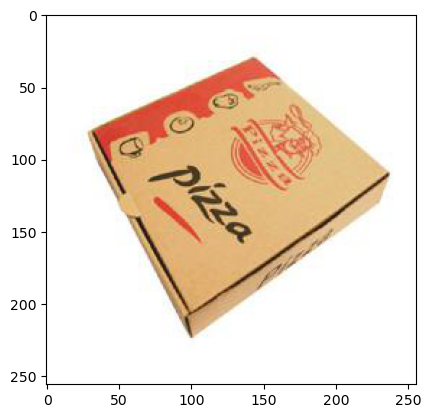

In [53]:
image1 = Image.open('华为云数据集/resized_train_data/img_55.jpg')
plt.imshow(image1)
plt.plot()

[]

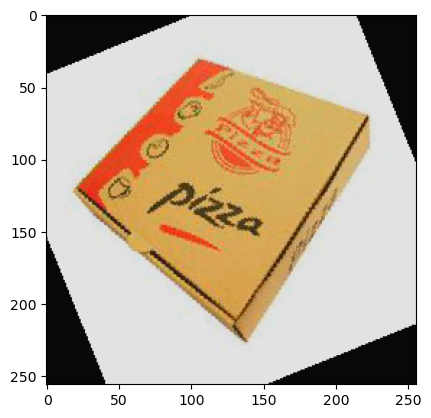

In [70]:
image1 = Image.open('华为云数据集/resized_train_data/img_55.jpg')
enhance_funcs = [rotate_image,adjust_brightness,adjust_contrast,adjust_saturation,adjust_hue]
for func in enhance_funcs:
    image1 = func(image1)
plt.imshow(image1)
plt.plot()

In [71]:
image1.save('华为云数据集/enhanced_example/img_55_6.jpg')